## Carga de los módulos

In [68]:
import numpy as np
import pandas as pd

### Para fines de estética en la salida, se desactivan las advertencias que pueda informar el intérprete Python

In [69]:
import warnings 
warnings.filterwarnings("ignore")

## Importación método para creación del conjunto de entrenamiento desde paquete *sklearn*

In [70]:
from sklearn.model_selection import train_test_split

## Paquete sklearn que contiene los métodos para las Mezclas Gaussianas

In [71]:
from sklearn.mixture import GaussianMixture

## Lectura de los datos desde el archivo *datosAB.txt*

In [72]:
datos = pd.read_table("datosAB.txt", sep='\t')

## Creación de conjunto de datos 

In [73]:
X = datos.iloc[:,:-1]
y = datos.iloc[:,2]

## Creación de subconjutos CP y CE

In [74]:
# Se elige una semilla para la selección pseudo-aleatoria
semilla = 123456

In [75]:
X_ce, X_cp, y_ce, y_cp = train_test_split(X, y, test_size=0.3, random_state=semilla)

## Creación y ajuste del Clasificador Mezclas Gaussianas

In [76]:
# Entrenamiento y ajuste
clasificador = GaussianMixture(n_components=2, random_state=semilla)
clasificador.fit(X_ce)

GaussianMixture(n_components=2, random_state=123456)

## La media de cada componente Gaussiano

In [77]:
clasificador.means_

array([[171.7001437 , 165.16445682],
       [168.75092037, 151.54318891]])

## La covarianza de cada componente Gaussiano

In [78]:
clasificador.covariances_

array([[[16.03890701, -5.55538211],
        [-5.55538211,  4.70507708]],

       [[18.89966456, -1.41948518],
        [-1.41948518, 22.89556923]]])

## Matrices de precisión de cada componente Gaussiano

In [79]:
clasificador.precisions_

array([[[0.10549022, 0.12455449],
        [0.12455449, 0.35960043]],

       [[0.05315852, 0.00329574],
        [0.00329574, 0.0438809 ]]])

## Predicción

In [80]:
y_pred = clasificador.predict(X_cp)

## Creación de los resultados estadísticos de la clasificación

### Importación de método para la matriz de confusión desde paquete *sklearn*

Predicción de la GMM: 0->r y 1->n

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [82]:
# Importación del etiquetador
from sklearn.preprocessing import LabelEncoder
# Creación del etiquetador
labelencoder_y = LabelEncoder()
# Etiquetado y ajuste
y_cp = labelencoder_y.fit_transform(y_cp)

### Cálculo de la matriz de confusión

In [83]:
mconf = confusion_matrix(y_cp, y_pred)

### Impresión de la matriz de confusión

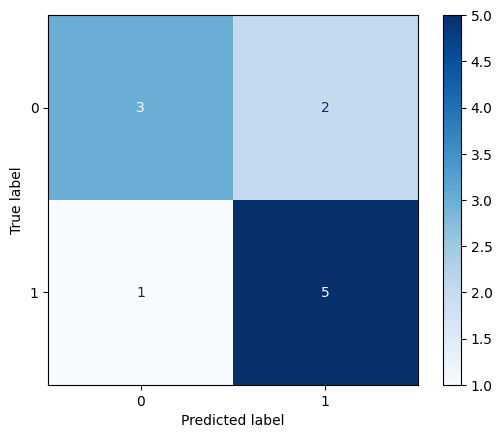

In [84]:
mconfg = ConfusionMatrixDisplay(mconf).plot(cmap='Blues') 

### Importación de método para la puntuación de precisión desde paquete *sklearn*

In [85]:
from sklearn.metrics import accuracy_score

### Cálculo de la puntuación de precisión

In [86]:
cc = accuracy_score(y_cp, y_pred)

### Impresión de la puntuación

In [87]:
print(f'Accuracy Score = {cc}')

Accuracy Score = 0.7272727272727273


## Importación de métodos para el gráfico 

In [88]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Ajuste del etiquetado de la variable y

In [89]:
# Importación del etiquetador
from sklearn.preprocessing import LabelEncoder
# Creación del etiquetador
labelencoder_y = LabelEncoder()
# Etiquetado y ajuste
y_ce = labelencoder_y.fit_transform(y_ce)

### **Nota:** Es necesario realizar el ajuste de nuevo dado que cambió la variable y debido al proceso de etiquetado

In [90]:
clasificador.fit(X_ce, y_ce)

GaussianMixture(n_components=2, random_state=123456)

# Se grafica todo el conjunto de datos empleando el clasificador DT para cada dato

In [ ]:
# Etiquetado y ajuste del conjunto de datos original
X_set, y_set = X, labelencoder_y.fit_transform(y)

## Creación de la malla (plano cartesiano)

In [91]:
X1, X2 = np.meshgrid(
    np.arange(start = X_set.iloc[:,0].min()-1, stop = X_set.iloc[:,0].max()+1, step=0.1),
    np.arange(start = X_set.iloc[:,1].min()-1, stop = X_set.iloc[:,1].max()+1, step=0.1)
)

## Creación del gráfico

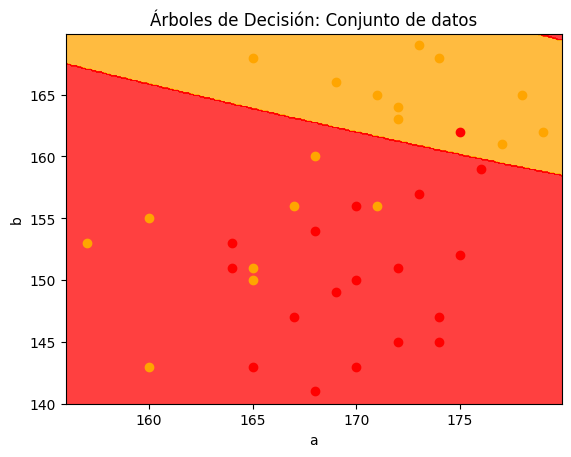

In [92]:
# Al construir la malla, se colorea la región de naranja o rojo 
# de acuerdo al clasificador DT obtenido
plt.contourf(X1, X2, 
    clasificador.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('orange', 'red'))                
)

# Se establecen los límites de los ejes x,y en el gráfico
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Se grafica cada dato en el plano cartesiano, la clase de cada dato determina el color. 
# Debido al proceso de etiquetado, 'n' fue sustituido por 0 y 'r' sustituido por 1
# 0 -> Naranja
# 1 -> Rojo
j=0
for i in y_set:
    if i==0:
        color = "orange"
    else:
        color = "red"
    plt.scatter(
        X_set.iloc[j,0],
        X_set.iloc[j,1],
        c = color,
        label = i
    )
    j=j+1

# Etiqueta del gráfico y sus ejes
plt.title('Árboles de Decisión: Conjunto de datos')
plt.xlabel('a')
plt.ylabel('b')

# Creación del gráfico
plt.show()

## Creación de los resultados estadísticos de la clasificación

Probabilidad de semejanza de los datos

In [93]:
clasificador.predict_proba(X_cp)

array([[1.75045366e-01, 8.24954634e-01],
       [9.92224337e-01, 7.77566291e-03],
       [2.51527897e-50, 1.00000000e+00],
       [2.44360766e-17, 1.00000000e+00],
       [1.70534690e-54, 1.00000000e+00],
       [9.11999232e-01, 8.80007676e-02],
       [1.39338254e-31, 1.00000000e+00],
       [2.65924469e-31, 1.00000000e+00],
       [2.58435955e-23, 1.00000000e+00],
       [9.39304954e-01, 6.06950465e-02],
       [9.85462136e-01, 1.45378643e-02]])

Score general de la clasificación, en escala logarítmica

In [94]:
clasificador.score(X_cp)

-7.092754991911707

Score por dato de la clasificación, en escala logarítmica

In [95]:
clasificador.score_samples(X_cp)

array([-7.79367551, -6.99153593, -7.67121123, -7.38914034, -9.07439805,
       -6.78875653, -6.34111896, -5.75182081, -5.80616183, -6.04174723,
       -8.3707385 ])

# Clasificar nuevos datos con DT

## Se clasifica un dato con el clasificador construido con DT

dato = (160, 145)

In [96]:
# Predicción del dato = (160, 145)
x = clasificador.predict([[160, 145]])
if x==0:
    print('naranja')
else:
    print('rojo')

rojo


## Se clasifica otro dato con el clasificador construido con DT

dato = (160, 165)

In [97]:
# Predicción del dato = (160, 165)
x = clasificador.predict([[160, 165]])
if x==0:
    print('naranja')
else:
    print('rojo')

rojo


## Ahora, a manera de prueba, se clasifica el promedio de los datos

In [ ]:
# X_set es un DataFrame de pandas
X_set.mean(0)

In [98]:
# Predicción del dato promedio = (169.6944, 155)
x = clasificador.predict([[169.6944, 155]])
if x==0:
    print('naranja')
else:
    print('rojo')

rojo
